# DA2 FINAL PROJECT - The Effect of Age on Money Spent on Shopping in 2022

* In this project, it's aimed to examine the change in the money spent by shopping mall customers on shopping according to age in 2022. In addition to age, the effects of variables such as gender, shopping category, payment method and shopping mall on age and money spent will also be the subject of this analysis.

- $y^E=\beta_0+\beta_1 x_1 +\beta_2x_2$
  
- y= money on spent on purchasing
- x1= age
- x2= conditional on/controlling variables

In [81]:
# importing packages
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal




warnings.filterwarnings("ignore")


In [82]:
# importing the prewritten helper functions
from py_helper_functions import *

In [83]:
# reading the raw data from github
df = pd.read_csv("https://raw.githubusercontent.com/ab-dum/DataAnalysis2/main/Final_Project/customer_shopping_data.csv")

In [84]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [85]:
# formatting the invoice date and filtering for 2022
df["invoice_date"] = pd.to_datetime(df["invoice_date"], format='%d/%m/%Y')
df = df.loc[df["invoice_date"].dt.year == 2022]
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity
11,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
...,...,...,...,...,...,...,...,...,...,...
99434,I186560,C117024,Female,39,Shoes,1,600.17,Cash,2022-03-21,Kanyon
99435,I141871,C298790,Female,62,Clothing,3,900.24,Cash,2022-02-02,Emaar Square Mall
99436,I579905,C265057,Female,57,Clothing,5,1500.40,Cash,2022-03-27,Cevahir AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon


In [86]:
# creating the total price column, creating dummy for female and taking log of the price,total price and age
df['total_price'] = df['quantity'] * df['price']
df['price'] = df['price'].astype(int)
df['total_price'] = df['total_price'].astype(int)
df["female"] = (df.gender == 'Female').astype(int) #dummy
df['lnprice'] = np.log(df['price'])
df['lnage'] = np.log(df['age'])
df['lntotalprice'] = np.log(df['total_price'])
df['lntotalprice'] = df['lntotalprice'].astype(int)

In [87]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,female,lnprice,lnage,lntotalprice
0,I138884,C241288,Female,28,Clothing,5,1500,Credit Card,2022-08-05,Kanyon,7502,1,7.313220,3.332205,8
5,I227836,C657758,Female,28,Clothing,5,1500,Credit Card,2022-05-24,Forum Istanbul,7502,1,7.313220,3.332205,8
6,I121056,C151197,Female,49,Cosmetics,1,40,Cash,2022-03-13,Istinye Park,40,1,3.688879,3.891820,3
10,I306368,C240286,Female,36,Food & Beverage,2,10,Cash,2022-12-25,Metrocity,20,1,2.302585,3.583519,2
11,I139207,C191708,Female,29,Books,1,15,Credit Card,2022-10-28,Emaar Square Mall,15,1,2.708050,3.367296,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99434,I186560,C117024,Female,39,Shoes,1,600,Cash,2022-03-21,Kanyon,600,1,6.396930,3.663562,6
99435,I141871,C298790,Female,62,Clothing,3,900,Cash,2022-02-02,Emaar Square Mall,2700,1,6.802395,4.127134,7
99436,I579905,C265057,Female,57,Clothing,5,1500,Cash,2022-03-27,Cevahir AVM,7502,1,7.313220,4.043051,8
99452,I219422,C441542,Female,45,Souvenir,5,58,Credit Card,2022-09-21,Kanyon,293,1,4.060443,3.806662,5


In [88]:
# creating Descriptive Statistics Table
df.loc[:, ["age", "quantity", "price", "total_price", "lntotalprice", "female", ]].describe()

,age,quantity,price,total_price,lntotalprice,female
count,45551.000000,45551.000000,45551.000000,45551.000000,45551.000000,45551.000000
mean,43.400847,3.010845,688.338741,2533.809730,5.685978,0.596957
std,14.987844,1.413256,945.139943,4247.158044,2.108861,0.490515
min,18.000000,1.000000,5.000000,5.000000,1.000000,0.000000
25%,30.000000,2.000000,40.000000,130.000000,4.000000,0.000000
50%,43.000000,3.000000,203.000000,600.000000,6.000000,1.000000
75%,56.000000,4.000000,1200.000000,2700.000000,7.000000,1.000000
max,69.000000,5.000000,5250.000000,26250.000000,10.000000,1.000000


* Average age = 43.4 (min:18 max:69)
* Mean of total price = 2532
* Min lntotalprice = 1, max lntotalprice = 10
* %60 female

In [89]:
# creating subgroups according to age : young, middle_age, old
df["age_group"] = "young"
df.loc[df["age"] > 35, "age_group"] = "middle_age"
df.loc[df["age"] > 60, "age_group"] = "old"

In [90]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,female,lnprice,lnage,lntotalprice,age_group
0,I138884,C241288,Female,28,Clothing,5,1500,Credit Card,2022-08-05,Kanyon,7502,1,7.313220,3.332205,8,young
5,I227836,C657758,Female,28,Clothing,5,1500,Credit Card,2022-05-24,Forum Istanbul,7502,1,7.313220,3.332205,8,young
6,I121056,C151197,Female,49,Cosmetics,1,40,Cash,2022-03-13,Istinye Park,40,1,3.688879,3.891820,3,middle_age
10,I306368,C240286,Female,36,Food & Beverage,2,10,Cash,2022-12-25,Metrocity,20,1,2.302585,3.583519,2,middle_age
11,I139207,C191708,Female,29,Books,1,15,Credit Card,2022-10-28,Emaar Square Mall,15,1,2.708050,3.367296,2,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99434,I186560,C117024,Female,39,Shoes,1,600,Cash,2022-03-21,Kanyon,600,1,6.396930,3.663562,6,middle_age
99435,I141871,C298790,Female,62,Clothing,3,900,Cash,2022-02-02,Emaar Square Mall,2700,1,6.802395,4.127134,7,old
99436,I579905,C265057,Female,57,Clothing,5,1500,Cash,2022-03-27,Cevahir AVM,7502,1,7.313220,4.043051,8,middle_age
99452,I219422,C441542,Female,45,Souvenir,5,58,Credit Card,2022-09-21,Kanyon,293,1,4.060443,3.806662,5,middle_age


## Horizontal Bar Chart for Average Total Price by Age Group

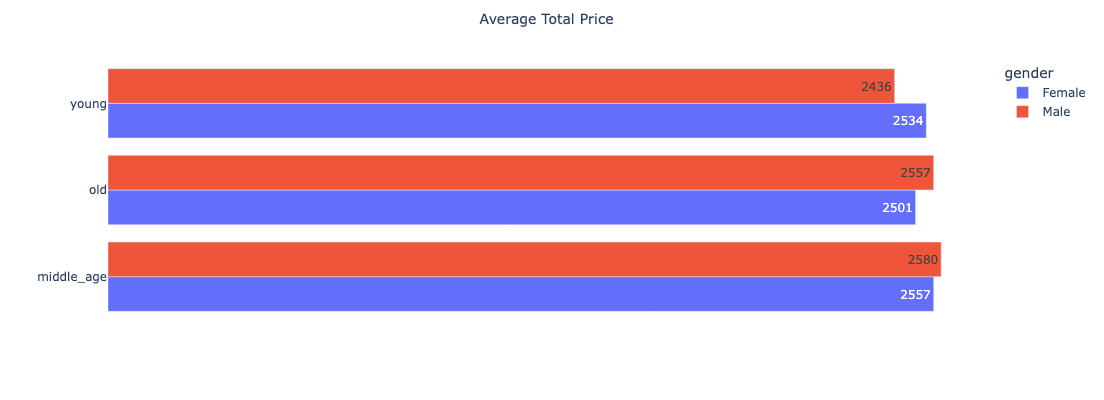

In [91]:
# grouping by 'age_group' and calculatig the mean of 'total_price'
average_price_by_age_group = df.groupby(['age_group', 'gender'])['total_price'].mean().round().reset_index()

# plotting the average amount of money spent by age group using plotly express
fig = px.bar(
    average_price_by_age_group,
    y='age_group',
    x='total_price',
    color='gender',
    labels={'total_price': 'Average Total Price'},
    orientation='h',  # setting the orientation to horizontal
    height=400,  # increasing the height of the plot
    text='total_price',  # showing the total_price values on the bars
)

# making the plot clustered
fig.update_layout(barmode='group')

# removing x-axis tick labels
fig.update_xaxes(tickvals=[])

# removing y-axis title
fig.update_yaxes(title_text='')

# setting the background color to white
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white'
)


# showing the plot
fig.show()

* In terms of average spending, the middle age group is the group that spends the most. It is followed by the elderly and the young, respectively.

## Shopping Line Chart for Each Age Group Throughout 2022

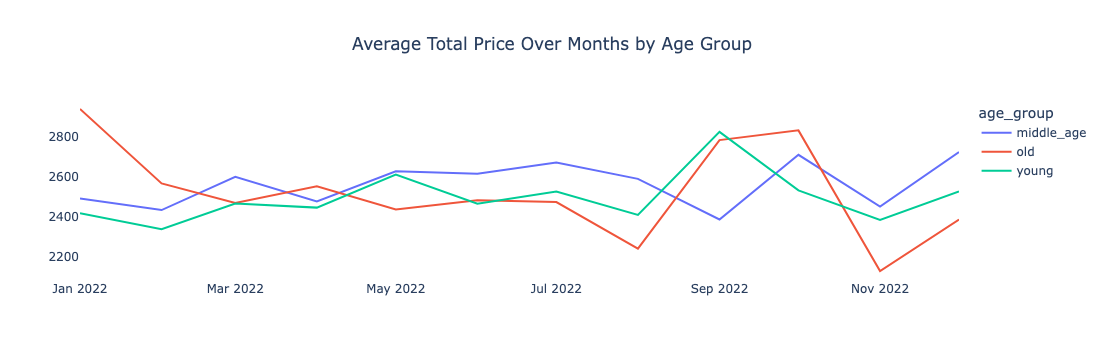

In [92]:
# Convert 'invoice_date' column to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Extract the month from the 'invoice_date' and create a new column
df['invoice_month'] = df['invoice_date'].dt.to_period('M').astype(str)

# Group by 'age_group' and 'invoice_month', calculate the mean of 'total_price'
average_price_by_month_age_group = df.groupby(['age_group', 'invoice_month'])['total_price'].mean().reset_index()

# Plot using Plotly Express
fig = px.line(
    average_price_by_month_age_group,
    x='invoice_month',
    y='total_price',
    color='age_group',
    labels={'total_price': 'Average Total Price'},
    title='Average Total Price Over Months by Age Group',
)

# Set the background color to white
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5,  # Center-align the title
)

# Remove x-axis and y-axis titles
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')

# Show the plot
fig.show()

* In general, between August and September, shopping practices of the elderly and young groups increase more than other periods. In addition, we can say that the young and old groups have the same pattern only in the period between July and September, and the other periods have opposite patterns. While October is the month in which the elderly group shops the most, November is the month in which this group shops the least.

## Clustered Bar Chart of Log Total Price by Category and Payment Method

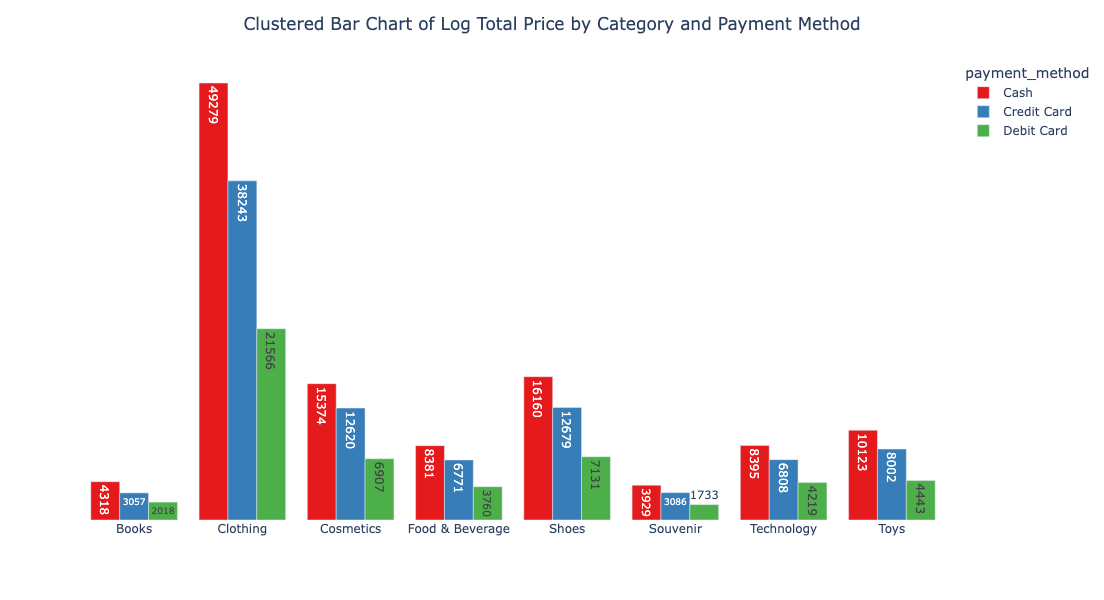

In [93]:
# converting 'payment_method' column to categorical
df['payment_method'] = pd.Categorical(df['payment_method'])

# grouping by 'category' and 'payment_method', and calculating sum of log total price
grouped_df = df.groupby(['category', 'payment_method'])['lntotalprice'].sum().reset_index()

# getting unique payment methods and define colors
payment_methods = grouped_df['payment_method'].unique()
colors = px.colors.qualitative.Set1[:len(payment_methods)]

# creating a clustered bar chart using Plotly Express
fig = px.bar(
    grouped_df,
    x='category',
    y='lntotalprice',
    color='payment_method',
    color_discrete_sequence=colors,
    text=grouped_df['lntotalprice'].round(0).astype(int),  # displaying integers (rounded lnprice) as text
    height=600,
)

# customizing the layout
fig.update_layout(
    barmode='group',  # setting the bar mode to 'group' for clustered bars
    plot_bgcolor='white',
    paper_bgcolor='white',
    title='Clustered Bar Chart of Log Total Price by Category and Payment Method',
    title_x=0.5,  # centering the main title
    xaxis_title=None,  # removing x-axis title
    yaxis_title=None,  # removing y-axis title
    yaxis=dict(showline=False, showgrid=False, showticklabels=False),  # removing y-axis
)

# showing the plot
fig.show()

In [94]:
df.loc[:, ["age", "lnage", "quantity", "price", "total_price", "lntotalprice", "female", ]].describe()

,age,lnage,quantity,price,total_price,lntotalprice,female
count,45551.000000,45551.000000,45551.000000,45551.000000,45551.000000,45551.000000,45551.000000
mean,43.400847,3.703257,3.010845,688.338741,2533.809730,5.685978,0.596957
std,14.987844,0.379641,1.413256,945.139943,4247.158044,2.108861,0.490515
min,18.000000,2.890372,1.000000,5.000000,5.000000,1.000000,0.000000
25%,30.000000,3.401197,2.000000,40.000000,130.000000,4.000000,0.000000
50%,43.000000,3.761200,3.000000,203.000000,600.000000,6.000000,1.000000
75%,56.000000,4.025352,4.000000,1200.000000,2700.000000,7.000000,1.000000
max,69.000000,4.234107,5.000000,5250.000000,26250.000000,10.000000,1.000000


## LOG-LEVEL REGRESSION

$(\ln{totalprice})^E = \alpha + \beta \times age$

In [95]:
# grouping lntotalprice mean by age
average_lntotalprice_by_age = df.groupby('age')['lntotalprice'].mean().reset_index()

# log-level regression
reg2 = smf.ols(formula="lntotalprice~age", data=average_lntotalprice_by_age).fit(cov_type="HC1")
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lntotalprice   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.911
Date:                Sun, 24 Dec 2023   Prob (F-statistic):              0.173
Time:                        01:41:29   Log-Likelihood:                 64.444
No. Observations:                  52   AIC:                            -124.9
Df Residuals:                      50   BIC:                            -121.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6500      0.030    188.911      0.000       5.591       5.709
age            0.0008      0.001      1.383      0.167      -0.000       0.002
==============================================================================
Omnibus:                        3.001   Durbin-Watson:                   2.422
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.640
Skew:                           0.455   Prob(JB):                        0.267
Kurtosis:                       2.375   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

* If the age increases by 1, the logarithmic total price value increases by 0.08% on average. Confidence interval goes from 5.709 to 0.002 which is quite wide. It can be understood that we can be 95% confident that average difference between log total price of people who have 1 year difference between their ages is between 5.709 and 0.002 and this interval does not include 0 that means that our coefficient (0.0008) is statistically significant.

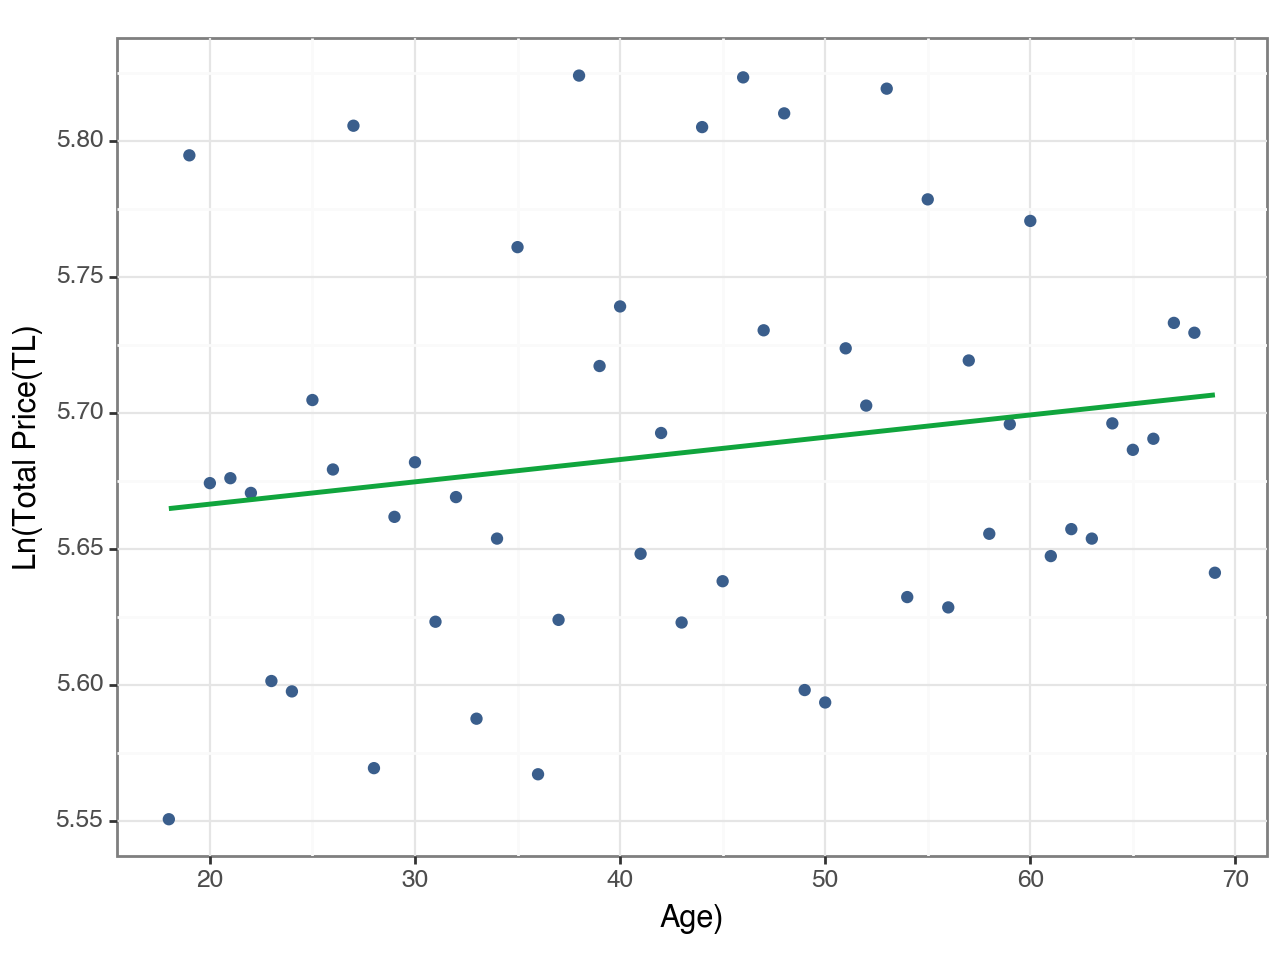

<Figure Size: (640 x 480)>

In [96]:
(
    ggplot(average_lntotalprice_by_age, aes(x="age", y="lntotalprice"))
    + geom_point(color=color[0])
    + geom_smooth(color=color[1], method="lm", se=False)
    + labs(x="Age)", y="Ln(Total Price(TL)")
    + theme_bw()
)

* Since the results obtained with log-log, level-log and level-level plots were not more reasonable than log-level, it was decided to proceed with log-level.

## Log total price and age: regression that capture nonlinearity

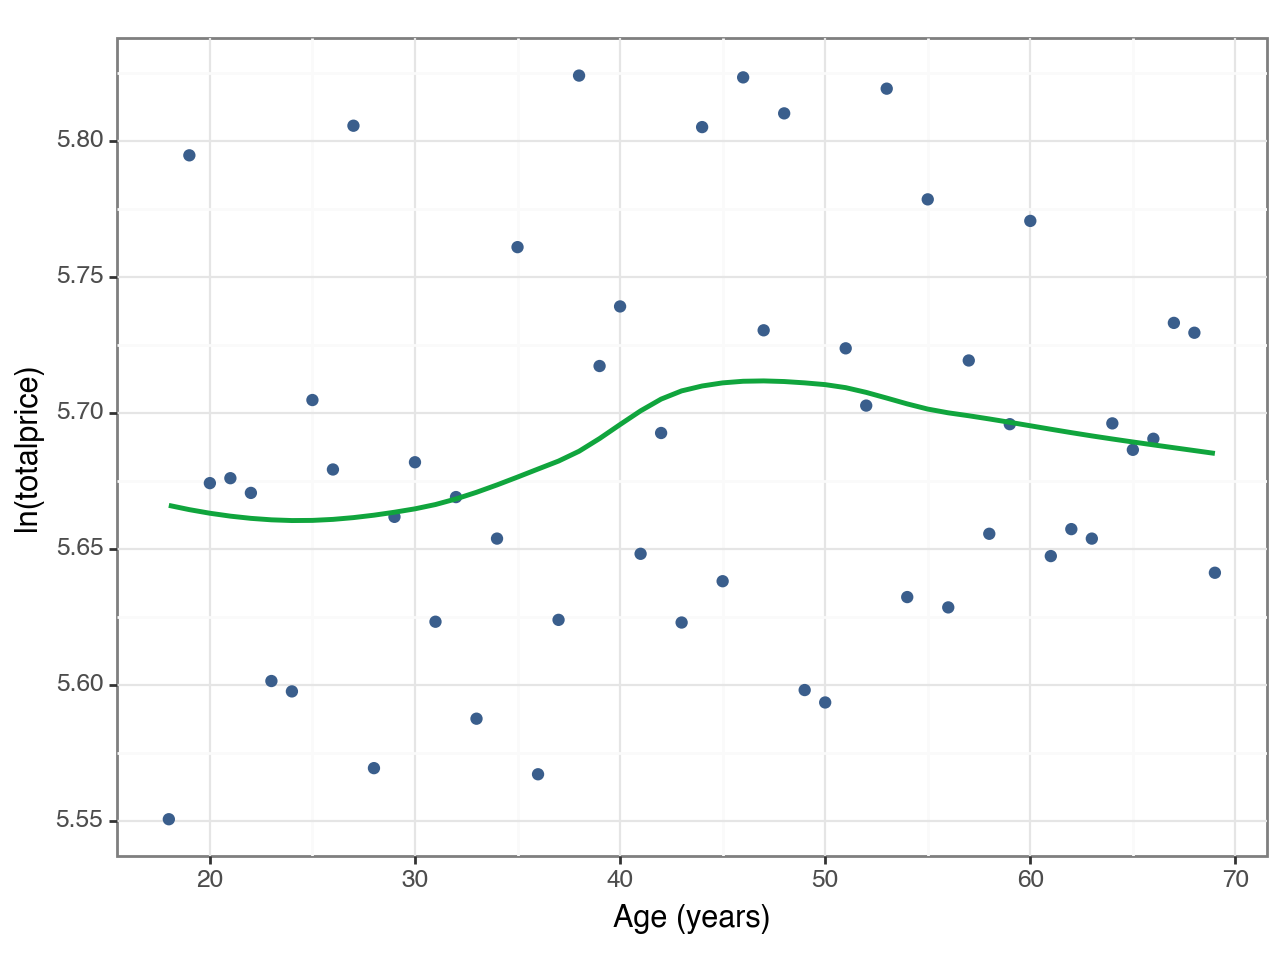

<Figure Size: (640 x 480)>

In [97]:
(
    ggplot(average_lntotalprice_by_age, aes(x="age", y="lntotalprice"))
    + geom_point(color=color[0])
    + geom_smooth(method="loess", color=color[1], se=False)
    + labs(x="Age (years)", y="ln(totalprice)")
    + theme_bw()
)

Total expenditure difference are slightly higher for older ages among young adults: average total expenditure is about 0.02 log unit more for 35-year-old people than for 18-year-old clients

People between 35 and 45 years old have the most difference in terms of total expenditure. Old age values are near to young people

- increasing for middle age
- flat middle
- slightly decreasing for older
- Knots at 30 and 50


Need to approximate the lowess curve with

* quadratic model
* piecewise linear spline with knots at 30 and 50

## Quadratic Model

In [98]:
average_lntotalprice_by_age["agesq"] = np.power(average_lntotalprice_by_age["age"], 2)

In [99]:
reg5 = smf.ols(formula="lntotalprice~age+agesq", data=average_lntotalprice_by_age).fit(cov_type="HC1")
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lntotalprice   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.014
Date:                Sun, 24 Dec 2023   Prob (F-statistic):              0.370
Time:                        01:41:30   Log-Likelihood:                 64.912
No. Observations:                  52   AIC:                            -123.8
Df Residuals:                      49   BIC:                            -118.0
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5725      0.099     56.165      0.000       5.378       5.767
age            0.0049      0.005      1.018      0.308      -0.004       0.014
agesq      -4.649e-05   5.17e-05     -0.899      0.369      -0.000    5.49e-05
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   2.463
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.139
Skew:                           0.379   Prob(JB):                        0.343
Kurtosis:                       2.358   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

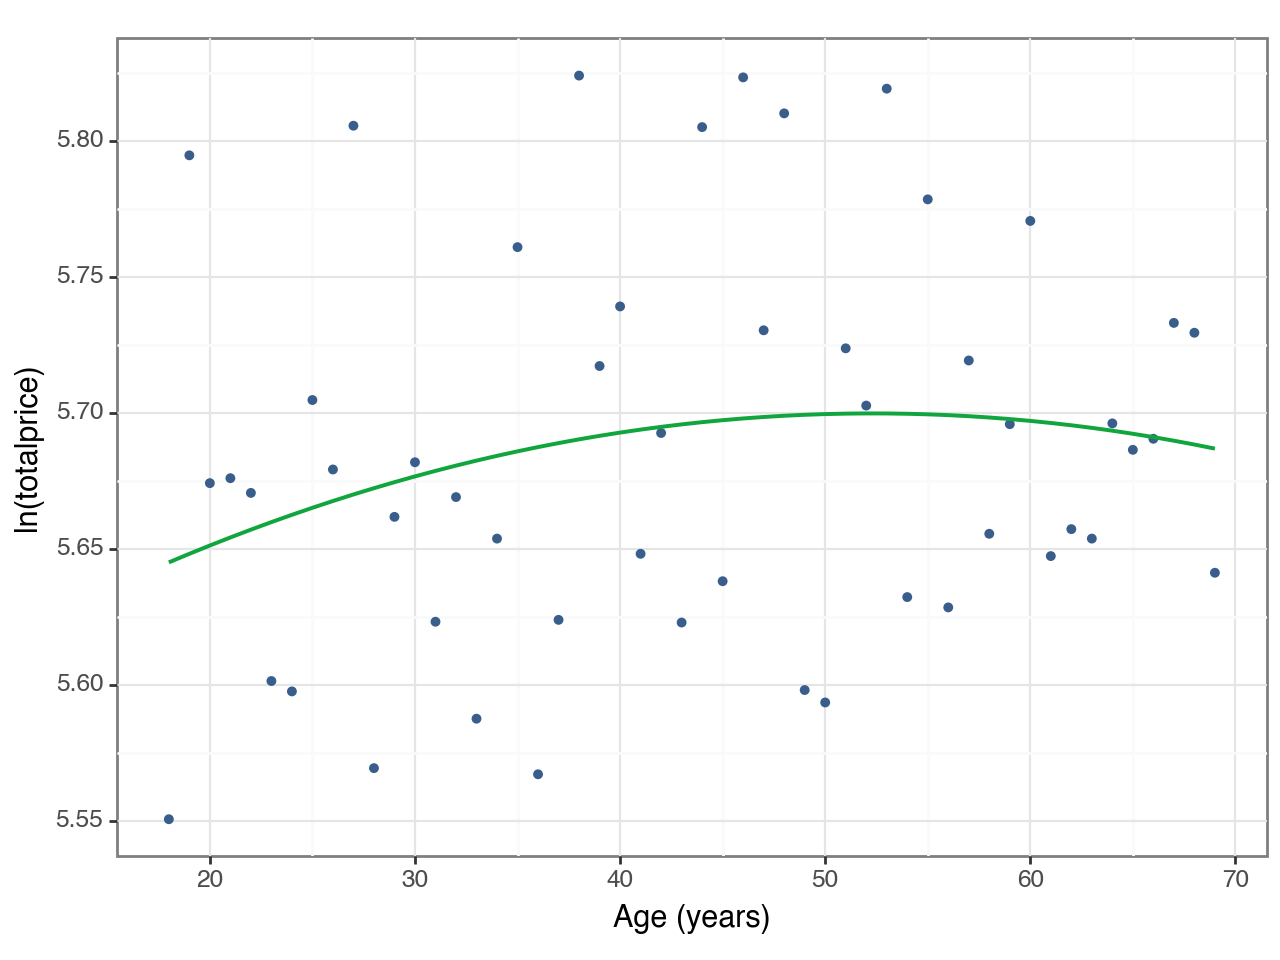

<Figure Size: (640 x 480)>

In [100]:
(
    ggplot(average_lntotalprice_by_age, aes(x="age", y="lntotalprice"),
    )
    + geom_point(color=color[0], size=1, alpha=0.8, show_legend=False, na_rm=True)
    + stat_smooth(method="lm", formula="y ~ poly(x,2)", colour=color[1], se=False, size=0.8, linetype="solid")
    + labs(x="Age (years)", y="ln(totalprice)")
    + theme_bw()
)

* Nearly same pattern with loess

## Piecewise Linear Spline with Knots at 30 and 50

In [101]:
reg6 = smf.ols(formula="lntotalprice~lspline(age,[30,50])", data=average_lntotalprice_by_age).fit(cov_type="HC1")
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lntotalprice   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8817
Date:                Sun, 24 Dec 2023   Prob (F-statistic):              0.457
Time:                        01:41:30   Log-Likelihood:                 65.227
No. Observations:                  52   AIC:                            -122.5
Df Residuals:                      48   BIC:                            -114.6
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.6691      0.128     44.404      0.000       5.419       5.919
lspline(age, [30, 50])[0]    -0.0002      0.005     -0.049      0.961      -0.010       0.009
lspline(age, [30, 50])[1]     0.0026      0.002      1.292      0.197      -0.001       0.007
lspline(age, [30, 50])[2]    -0.0018      0.002     -0.850      0.395      -0.006       0.002
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.500
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.551
Skew:                           0.286   Prob(JB):                        0.461
Kurtosis:                       2.376   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [102]:
stargazer = Stargazer([reg2, reg5, reg6])
stargazer.covariate_order(
    [
        "age",
        "agesq",
        "lspline(age, [30, 50])[0]",
        "lspline(age, [30, 50])[1]",
        "lspline(age, [30, 50])[2]",
        "Intercept",
    ]
)
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "agesq": "age squared",
        "lspline(age, [30, 50])[0]": "age spline <30",
        "lspline(age, [30, 50])[1]": "age spline 30–50",
        "lspline(age, [30, 50])[2]": "age spline 50<",
    }
)
stargazer

(1) Linear specification: Clients that are 1 year older are expected to spend 0.1% more on average (in this sample)

(2) Piecewise linear spline with 2 knots (30, 50):

among clients between 18 and 50, it does not matter.

between 30 and 50, those 1 year older are expected to spend 0.2% higher 

above 50, estimate not statistically different from 0

## Log Total Price - age and gender

In [103]:
average_lntotalprice_by_ageandfemale = df.groupby(['age', 'female'])['lntotalprice'].mean().reset_index()

reg7 = smf.ols("lntotalprice~age+female", data=average_lntotalprice_by_ageandfemale).fit(covtype="HC1")
reg8 = smf.ols(formula="age~female", data=df).fit(cov_type="HC1")

In [104]:
stargazer = Stargazer([reg7,reg8])
stargazer.custom_columns(["ln total price", "age"], [1, 1])
stargazer.covariate_order(["female", "age", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

* Female clients are tend to spend 0.07 less than male clients on average. At same age, female clients are tend to spend 5.1 less than man on average

## Age distribution: Age distribution separately for males and females

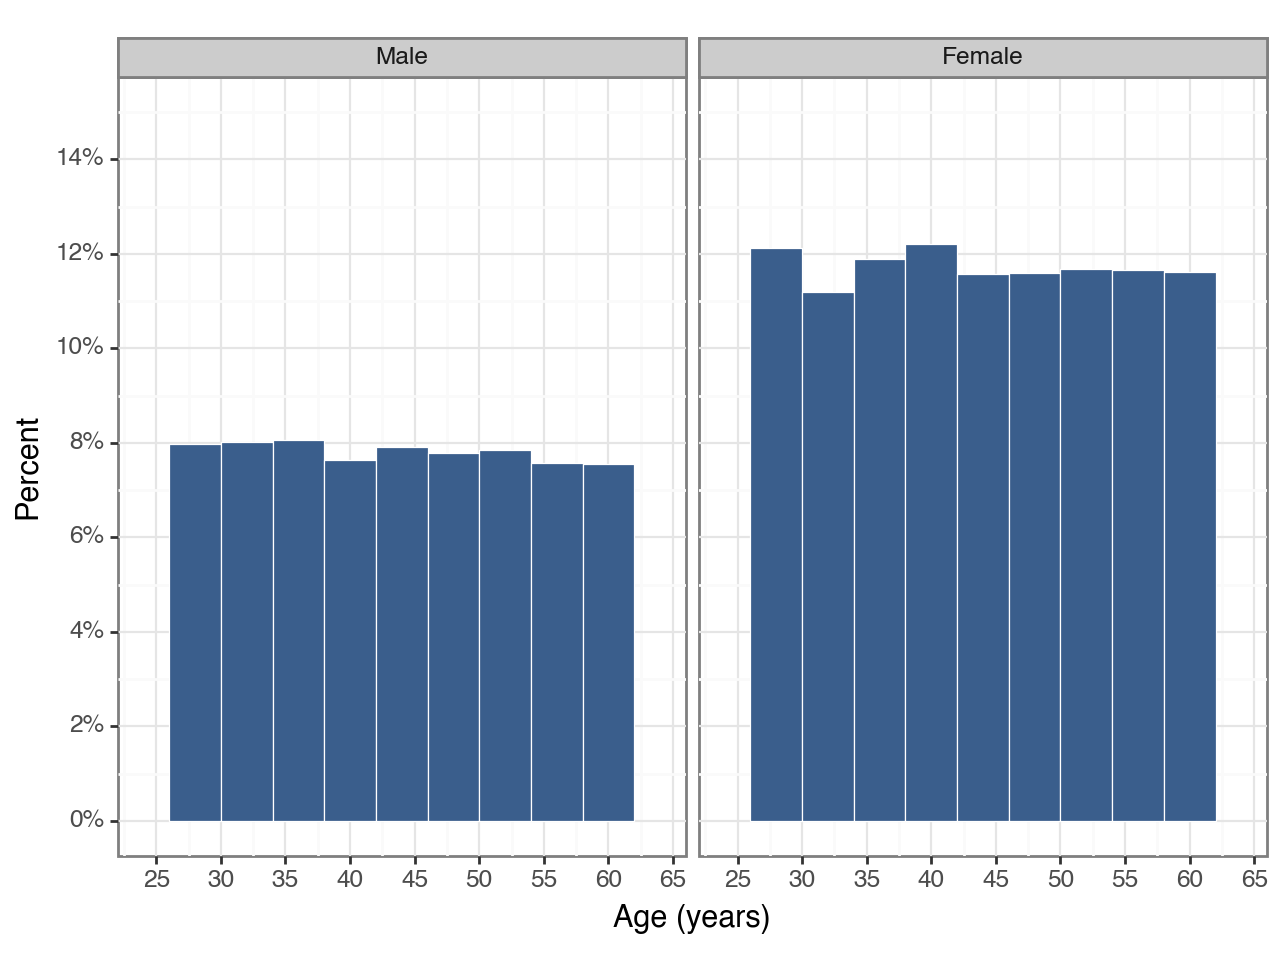

<Figure Size: (640 x 480)>

In [105]:
(
    ggplot(df, aes(x="age", y="2*stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=4,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Age (years)", y="Percent")
    + facet_wrap("~female", labeller={"0": "Male", "1": "Female"})
    + labs(x="Age (years)", y="Percent")
    + scale_x_continuous(
        limits=(24, 64),
        breaks=seq(25, 65, by=5),
    )
    + scale_y_continuous(
        limits=(0, 0.15), breaks=seq(0, 0.15, by=0.02), labels=percent_format()
    )
    + theme_bw()
)

## Nonlinear pattern log totalprice - age
* Including squared, cubic and power 4

In [106]:
average_lntotalprice_by_ageandfemale["agesq"] = np.power(average_lntotalprice_by_ageandfemale["age"], 2)
average_lntotalprice_by_ageandfemale["agecu"] = np.power(average_lntotalprice_by_ageandfemale["age"], 3)
average_lntotalprice_by_ageandfemale["agequ"] = np.power(average_lntotalprice_by_ageandfemale["age"], 4)

In [107]:
reg9 = smf.ols(formula="lntotalprice~female", data=average_lntotalprice_by_ageandfemale).fit(cov_type="HC1") #unconditional
reg10 = smf.ols(formula="lntotalprice~female+age", data=average_lntotalprice_by_ageandfemale).fit(cov_type="HC1") #age enters linearly
reg11 = smf.ols(formula="lntotalprice~female+age+agesq", data=average_lntotalprice_by_ageandfemale).fit(cov_type="HC1") #add quadratic
reg12 = smf.ols(formula="lntotalprice~female+age+agesq+agecu+agequ", data=average_lntotalprice_by_ageandfemale).fit(cov_type="HC1") #4-th order polynomial

In [108]:
stargazer = Stargazer([reg9, reg10, reg11, reg12])
stargazer.covariate_order(["female", "age", "agesq", "agecu", "agequ", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

- estimates of conditional difference are close to each other and within each others' CIs

> the functional form for age does not really matter if we are interested in the average totalprice gap

- coefficient estimates of higher order polynomials are not statistically significant

> nonlinear pattern is very unlikely true in the population

- Adjusted $R^2$ goes up for the more complicated specifications 


## Gender differences in totalprice – log totalprice, gender, age, and their interaction

In [109]:
reg13 = smf.ols(formula="lntotalprice~age", data=average_lntotalprice_by_ageandfemale.query("female==1")).fit(cov_type="HC1")
reg14 = smf.ols(formula="lntotalprice~age", data=average_lntotalprice_by_ageandfemale.query("female==0")).fit(cov_type="HC1")
reg15 = smf.ols(formula="lntotalprice~female+age+age*female", data=average_lntotalprice_by_ageandfemale).fit(cov_type="HC1")

In [110]:
stargazer = Stargazer([reg13, reg14, reg15])
stargazer.covariate_order(["female", "age", "age:female", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant", "age:female": "female x age"})
stargazer.custom_columns(["Women", "Men", "All"], [1, 1, 1])
stargazer

- (1): women who are one year older are expected to spend 0.1% less, on average
- (2): men who are one year older are expected to spend 0.2% more, on average
- (3): slope of log totalprice - age pattern is 0.003 less positive for women, on average  -> can do **inference** about gender differences

## Gender differences in totalprice – log totalprice, gender, 4th-order polynomial of age, and their interaction

In [111]:
reg16 = smf.ols(formula="lntotalprice~age+agesq+agecu+agequ", data=average_lntotalprice_by_ageandfemale.query("female==1")).fit(
    cov_type="HC1"
) #women
reg17 = smf.ols(formula="lntotalprice~age+agesq+agecu+agequ", data=average_lntotalprice_by_ageandfemale.query("female==0")).fit(
    cov_type="HC1"
) #men
reg18 = smf.ols(
    formula="lntotalprice ~ age + agesq + agecu + agequ + female + female*age + female*agesq + female*agecu + female*agequ",
    data=average_lntotalprice_by_ageandfemale,
).fit(cov_type="HC1")

In [112]:
Stargazer([reg16, reg17, reg18])

## Causal Analysis

## Including other variables to see the effects of them to the regression

In [113]:
df['category'].unique()

array(['Clothing', 'Cosmetics', 'Food & Beverage', 'Books', 'Toys',
       'Shoes', 'Technology', 'Souvenir'], dtype=object)

In [114]:
# creating dummies for unique category variables
df["Clothing"] = (df["category"] == 'Clothing').astype(int)
df["Cosmetics"] = (df["category"] == 'Cosmetics').astype(int)
df["FoodBeverage"] = (df["category"] == 'Food & Beverage').astype(int)
df["Books"] = (df["category"] == 'Books').astype(int)
df["Toys"] = (df["category"] == 'Toys').astype(int)
df["Shoes"] = (df["category"] == 'Shoes').astype(int)
df["Technology"] = (df["category"] == 'Technology').astype(int)
df["Souvenir"] = (df["category"] == 'Souvenir').astype(int)

df["ages"] = np.power(df["age"], 2)
df["agesq"] = np.power(df["age"], 2)
df["agecu"] = np.power(df["age"], 3)
df["agequ"] = np.power(df["age"], 4)

# creating dummies for unique payment method variables
df["CreditCard"] = (df["payment_method"] == 'Credit Card').astype(int)
df["Cash"] = (df["payment_method"] == 'Cash').astype(int)
df["DebitCard"] = (df["payment_method"] == 'Debit Card').astype(int)

# creating dummies for unique shopping mall variables
df["Kanyon"] = (df["shopping_mall"] == 'Kanyon').astype(int)
df["ForumIstanbul"] = (df["shopping_mall"] == 'Forum Istanbul').astype(int)
df["IstinyePark"] = (df["shopping_mall"] == 'Istinye Park').astype(int)
df["Metrocity"] = (df["shopping_mall"] == 'Metrocity').astype(int)
df["EmaarSquareMall"] = (df["shopping_mall"] == 'Emaar Square Mall').astype(int)
df["CevahirAVM"] = (df["shopping_mall"] == 'Cevahir AVM').astype(int)
df["ZorluCenter"] = (df["shopping_mall"] == 'Zorlu Center').astype(int)
df["MallofIstanbul"] = (df["shopping_mall"] == 'Mall of Istanbul').astype(int)
df["MetropolAVM"] = (df["shopping_mall"] == 'Metropol AVM').astype(int)
df["ViaportOutlet"] = (df["shopping_mall"] == 'Viaport Outlet').astype(int)

df["quantitysq"] = np.power(df["quantity"], 2)
df["quantitycu"] = np.power(df["quantity"], 3)
df["quantityqu"] = np.power(df["quantity"], 4)


In [115]:
df["quantitysq"] = np.power(df["quantity"], 2)
df["quantitycu"] = np.power(df["quantity"], 3)
df["quantityqu"] = np.power(df["quantity"], 4)

In [116]:
grouped_data = df.groupby(['age', 'female', 'Clothing', 'Cosmetics', 'FoodBeverage', 'Books', 'Toys', 'Shoes', 'Technology', 'Souvenir', 'CreditCard', 'Cash', 'DebitCard', 'Kanyon', 'ForumIstanbul', 'IstinyePark', 'Metrocity',
                           'EmaarSquareMall', 'CevahirAVM', 'ZorluCenter', 'MallofIstanbul', 'MetropolAVM', 'ViaportOutlet', 'agesq', 'agecu', 'agequ', 'quantitysq', 'quantitycu', 'quantityqu'])['lntotalprice'].mean().reset_index()

In [117]:
# Extended regressions
reg19 = smf.ols(formula="lntotalprice ~ female", data=df).fit(cov_type="HC1")
reg20 = smf.ols(formula="lntotalprice ~ female + age", data=df).fit(cov_type="HC1")
reg21 = smf.ols(
    formula="lntotalprice ~ female + age + Clothing + Cosmetics + FoodBeverage + Books + Toys + Shoes + Technology + Souvenir + CreditCard + Cash + DebitCard + Kanyon + ForumIstanbul + IstinyePark + Metrocity + \
             EmaarSquareMall + CevahirAVM + ZorluCenter + MallofIstanbul + MetropolAVM + ViaportOutlet",
    data=df,
).fit(cov_type="HC1")
reg22 = smf.ols(
    formula="lntotalprice ~ age + female + Clothing + Cosmetics + FoodBeverage + Books + Toys + Shoes + Technology + Souvenir + CreditCard + Cash + DebitCard + Kanyon + ForumIstanbul + IstinyePark + Metrocity + \
             EmaarSquareMall + CevahirAVM + ZorluCenter + MallofIstanbul + MetropolAVM + ViaportOutlet + agesq + agecu + agequ + quantitysq + quantitycu + quantityqu",
    data=df,   
).fit(cov_type="HC1")

In [118]:
stargazer = Stargazer([reg19, reg20, reg21, reg22])
stargazer.covariate_order(["female"])
stargazer.add_line("Age", ["", "Yes", "Yes", "Yes"])
stargazer.add_line("Category", ["", "", "Yes", "Yes"])
stargazer.add_line("Payment Method", ["", "", "Yes", "Yes"])
stargazer.add_line("Shopping Mall", ["", "", "Yes", "Yes"])
stargazer.add_line("Age in polynomial", ["", "", "", "Yes"])
stargazer.add_line("Hours in polynomial", ["", "", "", "Yes"])
stargazer

- (1): women are expected to spend, on average, 0.5% less than men (in the data)
- (2): conditioning on age and on education, the difference is 0.5% -> differences in age and education do not contribute that much to gender difference in totalprice 
- (3): including all other covariates, the estimated coefficient is 0.4% -> comparing people with same payment method, category and shopping malls, women are expected to spend 0.4% more than men
- (4): include potential nonlinearities in age and quantities -> does not matter

In [ ]:
# creating pdf file from this ipynb file
from nbconvert import PDFExporter
import nbformat


notebook_filename = 'DA2_Final_Project_ApoDuman.ipynb'

# reading the notebook
with open(notebook_filename, 'r', encoding='utf-8') as notebook_file:
    notebook_content = nbformat.read(notebook_file, as_version=4)

# creating a PDFExporter
pdf_exporter = PDFExporter()

# generating a PDF
pdf_data, _ = pdf_exporter.from_notebook_node(notebook_content)

# writing the PDF to a file
pdf_filename = notebook_filename.replace('.ipynb', '.pdf')
with open(pdf_filename, 'wb') as pdf_file:
    pdf_file.write(pdf_data)